In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

df= pd.read_excel("D:\CIT\SEM 5\Human Resources System Developement Lab\EX 4.xlsx",sheet_name="BARS AND HCRI")
df.head(6)

,Name,Age,Position,Experience,Email,Contact,BARS,HCRI
0,Alex,47,Warehouse manager,1,Alex@gmail.com,4764868303,2,0.608333
1,Antony,38,Product manager,15,Antony@gmail.com,4256107013,1,0.558333
2,Benjamin,29,Furniture designer,7,Benjamin@gmail.com,5991360188,2,0.566667
3,chris,22,Product manager,16,chris@gmail.com,1095854921,4,0.558333
4,Carl,20,Warehouse manager,4,Carl@gmail.com,6097882103,1,0.608333
5,Canem,42,Product manager,13,Canem@gmail.com,8397114046,3,0.558333


In [5]:
df.dtypes
df.isnull().sum()
data = df.drop(['Name', 'Age','Position', 'Experience', 'Email', 'Contact'], axis=1)
cor = data.corr()
print(cor)

          BARS      HCRI
BARS  1.000000  0.041303
HCRI  0.041303  1.000000


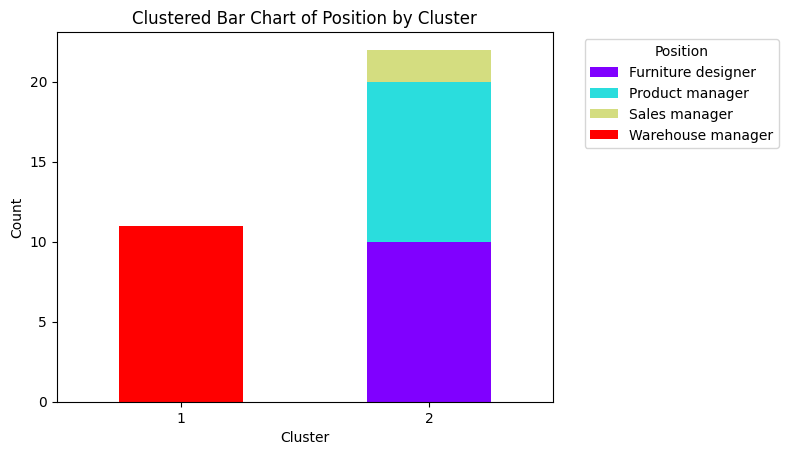

In [22]:
label_encoder = LabelEncoder()
df['Position_Code'] = label_encoder.fit_transform(df['Position'])

linkage_matrix = hierarchy.linkage(df[['BARS', 'Position_Code']], method='ward')

num_clusters = 2
labels = hierarchy.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

df['Cluster'] = labels

cluster_counts = df.groupby(['Cluster', 'Position']).size().unstack(fill_value=0)
cluster_counts.plot(kind='bar', stacked=True, colormap='rainbow')

plt.title("Clustered Bar Chart of Position by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

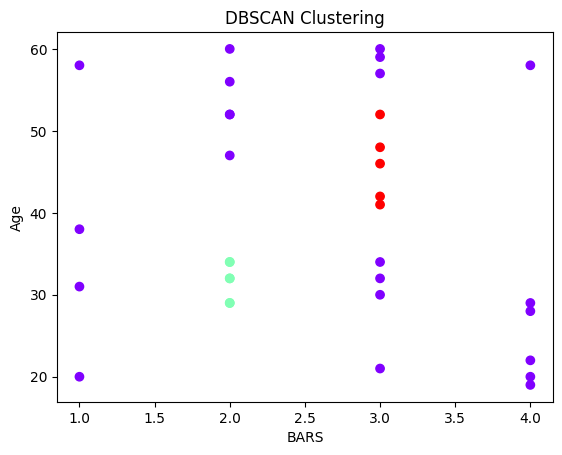

In [27]:
from sklearn.cluster import DBSCAN

bars = df['BARS'].values
age = df['Age'].values

feat = np.column_stack((bars, age))

scaler = StandardScaler()
feat = scaler.fit_transform(feat)

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(feat)

df['Cluster'] = labels

plt.scatter(bars, age, c=labels, cmap='rainbow')
plt.xlabel('BARS')
plt.ylabel('Age')
plt.title('DBSCAN Clustering')
plt.show()

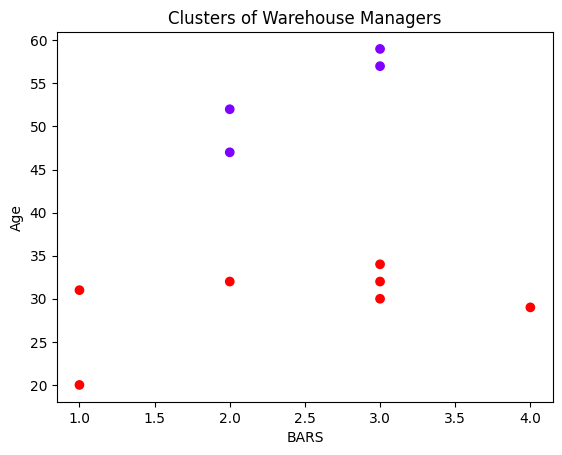

In [35]:
w_df = df[df['Position'] == 'Warehouse manager']

data = w_df[['BARS', 'Age']].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

linkage_matrix = hierarchy.linkage(scaled_data, method='ward')

cutoff_distance = 4 
clusters = hierarchy.fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

w_df1 = w_df.copy()
w_df1.loc[:, 'Cluster'] = clusters

plt.scatter(w_df1['BARS'], w_df1['Age'], c=clusters, cmap='rainbow')
plt.xlabel('BARS')
plt.ylabel('Age')
plt.title('Clusters of Warehouse Managers')
plt.show()

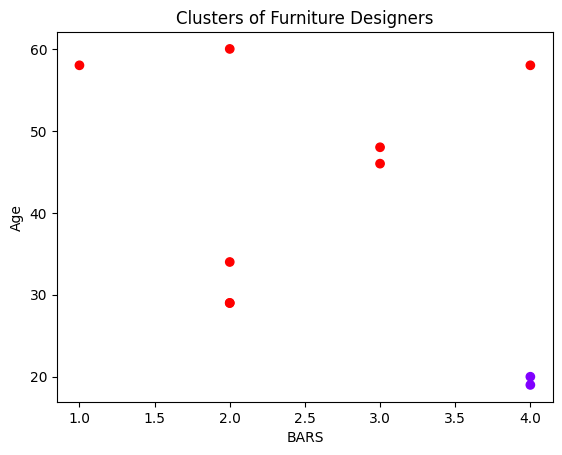

In [37]:
f_df = df[df['Position'] == 'Furniture designer']

data = f_df[['BARS', 'Age']].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

linkage_matrix = hierarchy.linkage(scaled_data, method='ward')

cutoff_distance = 4
clusters = hierarchy.fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

f_df1 = f_df.copy()
f_df1.loc[:, 'Cluster'] = clusters

plt.scatter(f_df1['BARS'], f_df1['Age'], c=clusters, cmap='rainbow')
plt.xlabel('BARS')
plt.ylabel('Age')
plt.title('Clusters of Furniture Designers')
plt.show()

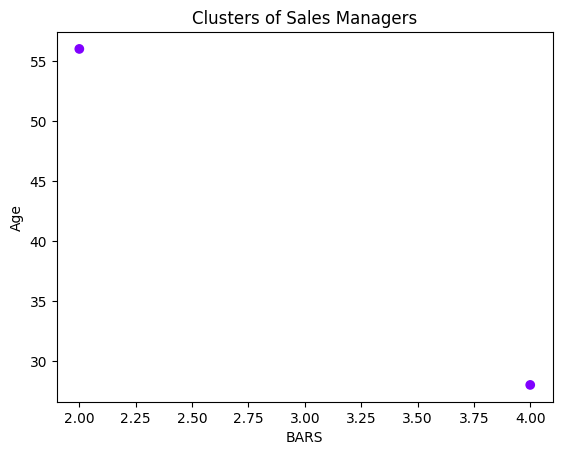

In [40]:
s_df = df[df['Position'] == 'Sales manager']

data = s_df[['BARS', 'Age']].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

linkage_matrix = hierarchy.linkage(scaled_data, method='ward')

cutoff_distance = 4 
clusters = hierarchy.fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

s_df1 = s_df.copy()

s_df1.loc[:, 'Cluster'] = clusters

plt.scatter(s_df1['BARS'], s_df1['Age'], c=clusters, cmap='rainbow')
plt.xlabel('BARS')
plt.ylabel('Age')
plt.title('Clusters of Sales Managers')
plt.show()


In [1]:
p_df = df[df['Position'] == 'Product manager']

data = p_df[['BARS', 'Age']].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

linkage_matrix = hierarchy.linkage(scaled_data, method='ward')

cutoff_distance = 4 
clusters = hierarchy.fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

p_df1 = p_df.copy()

p_df1.loc[:, 'Cluster'] = clusters

plt.scatter(p_df1['BARS'], p_df1['Age'], c=clusters, cmap='rainbow')
plt.xlabel('BARS')
plt.ylabel('Age')
plt.title('Clusters of Product Managers')
plt.show()

NameError: name 'df' is not defined

NameError: name 'df' is not defined